# Install

In [54]:
pip install praw

In [55]:
pip install googletrans==3.1.0a0

# Imports, Downloads

In [56]:
import praw
import csv
import os
import re
import pandas as pd
from gensim import corpora
from gensim.models.phrases import Phraser, Phrases
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from googletrans import Translator

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# PRAW

In [57]:
# Initialize Reddit API (provide your credentials)
reddit = praw.Reddit(client_id='BX2F0IEhtlOLgs222TjXiA', client_secret='DKRcHXyZbo8Gk3QJfYv91dnmI2w0Zw', user_agent='webscrape')

# Initialize Google Translate
translator = Translator(service_urls=['translate.googleapis.com'])

# List of URLs of Reddit posts and other websites
urls = [
    "https://www.reddit.com/r/studentsph/comments/129iuxa/public_education_here_in_the_philippines_is_a/",
    "https://www.reddit.com/r/Philippines/comments/7h1hb3/why_the_philippines_educational_system_is_awful/",
    "https://www.reddit.com/r/Philippines/comments/y673g9/education_in_philippines/",
    "https://www.reddit.com/r/Philippines/comments/r4xka6/is_there_hope_for_the_philippine_education_system/",
    "https://www.reddit.com/r/Philippines/comments/15zpn3j/decline_in_education_in_the_philippines/",
    "https://www.reddit.com/r/Philippines/comments/hb96xs/can_someone_please_explain_the_philippine/",
    "https://www.reddit.com/r/Philippines/comments/z4bkw6/education_in_the_philippines/",
    "https://www.reddit.com/r/Philippines/comments/iuf6uk/i_feel_like_the_quality_of_education_in_the/",
    "https://www.reddit.com/r/studentsph/comments/16qv81f/why_is_philippine_education_system_sht/",
    "https://www.reddit.com/r/Philippines/comments/1djenvj/summary_of_what_happened_to_the_philippine/",
    "https://www.reddit.com/r/2philippines4u/comments/1b1d68q/filipino_education_system/",
]

file_name = 'raw_comments.csv'

# Function to extract post ID from URL
def get_post_id(url):
    return url.split('/')[-3]

# Open the CSV file for writing
with open(file_name, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['URL', 'Post Title', 'Comment ID', 'Comment Author', 'Comment Body'])

    for url in urls:
        try:
            post_id = get_post_id(url)
            submission = reddit.submission(id=post_id)

            submission.comments.replace_more(limit=None)
            for comment in submission.comments.list():
                writer.writerow([url, submission.title, comment.id, comment.author, comment.body])
        except Exception as e:
            print(f"An error occurred for URL: {url}\nError: {e}")

print(f"Comments have been successfully written to {file_name}")

data = pd.read_csv('raw_comments.csv')
data

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Comments have been successfully written to raw_comments.csv


,URL,Post Title,Comment ID,Comment Author,Comment Body
0,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jenl8h5,MiraclesOrbit08,"True. Tbh, noong nasa normal public school ako..."
1,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jenmgd7,BleachIsNoxious,reading this makes me so fucking sad. the educ...
2,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jenhwun,yourlegendofzelda,"Agree, but the problems are not on the teacher..."
3,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jeo1l9g,skaDIE_,"I saw a post on the facebook before, a Filipin..."
4,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jenfr4s,NaN,"Culturally, Filipinos don't see any value in l..."
...,...,...,...,...,...
527,https://www.reddit.com/r/2philippines4u/commen...,Filipino Education System ❤️💚,ksgxtj3,NoviceClent03,Actually yan din naiisip ko kapag may nakikita...
528,https://www.reddit.com/r/2philippines4u/commen...,Filipino Education System ❤️💚,ksh0fm2,haikusbot,*But tbf tho*\n\n*Why would a pinoy care about...
529,https://www.reddit.com/r/2philippines4u/commen...,Filipino Education System ❤️💚,ksh5sch,AutoModerator,\nTHE FILIPINO LANGUAGE IS NOT A REAL LANGUAGE...
530,https://www.reddit.com/r/2philippines4u/commen...,Filipino Education System ❤️💚,kske250,nikewalks,Si Jimmy Kimmel ba to?


# Preprocessing

## Basic Preprocessing

In [58]:
print(data.shape)

# Remove duplicates
data.drop_duplicates(inplace=True)
data.to_csv('raw_comments.csv', index=False)

# Display rows and columns to check if there are removed duplicates
print(data.shape)

# Check for missing values
data.isnull().sum()

# Remove rows with missing values
data.dropna(inplace=True)

# Check if there are removed rows
print(data.isnull().sum())

print(data.shape)

(532, 5)
(532, 5)
URL               0
Post Title        0
Comment ID        0
Comment Author    0
Comment Body      0
dtype: int64
(439, 5)


## Google Translation

In [59]:
# Function to clean and translate text
def clean_and_translate_text(text):
    # Translate text to English if it's not in English
    translated = translator.translate(text).text
    # Convert to lowercase
    translated = translated.lower()
    # Remove special characters and numbers
    translated = re.sub(r'[^a-zA-Z\s]', '', translated)
    # Remove extra spaces
    translated = re.sub(r'\s+', ' ', translated).strip()
    return translated

## Text Cleaning

In [61]:
# Apply text cleaning and translation
data['Cleaned Comment Body'] = data['Comment Body'].apply(clean_and_translate_text)

# Display a few examples of cleaned and translated text
print("Cleaned and Translated Text Examples:")
print(data['Cleaned Comment Body'].head())

Cleaned and Translated Text Examples:
0    true tbh when i was in normal public school i ...
1    reading this makes me so fucking sad the educa...
2    agree but the problems are not on the teachers...
3    i saw a post on the facebook before a filipino...
5    i dont think its a ph only problem and also no...
Name: Cleaned Comment Body, dtype: object


## Tokenization and Stopwords

In [62]:
# Custom stopwords list (for Filipino)
filipino_words = ['na', 'sa', 'ang', 'at', 'ung', 'yung', 'ng', 'ko', 'mga', 'lang', 'pa', 'may', 'di', 'hindi', 'kasi', 'naman',
                  'namin', 'nila', 'ako', 'pero', 'mo', 'kung', 'ka', 'nung', 'sila', 'rin', 'tapos', 'talaga', 'para', 'din', 'kaya',
                  'make', 'like', 'school', 'student', 'teacher', 'im', 'also', 'dont', 'even', 'country', 'get', 'one',  'education',
                  'know', 'philippine', 'really']

# Tokenization and stopword removal function
stop_words = set(stopwords.words('english')).union(set(filipino_words))
print(stop_words)

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply tokenization and stopword removal
data['Tokenized Comment Body'] = data['Cleaned Comment Body'].apply(tokenize_and_remove_stopwords)

# Display a few examples of tokenized text
print("\nTokenized Text Examples:")
print(data['Tokenized Comment Body'].head())

{"it's", 'ung', 'only', 'which', 'hasn', 'ours', 'a', 'wasn', 'his', 'here', 'mightn', 'shouldn', 'teacher', 'was', 'over', 'doesn', 'not', 'they', 'again', 're', 'don', 'an', 'you', 'being', "didn't", 'above', "wasn't", 'or', 'he', 'yours', 'did', 'once', 'y', 'haven', 'both', 'for', "couldn't", 'isn', 'your', 'sila', 'namin', 'she', 'hadn', 'more', 'student', 'itself', 'can', 'kaya', 'do', 'off', 'will', 'school', 'own', 'has', 'on', 'needn', 'talaga', 'have', "hasn't", 'are', 'him', 'against', 'too', 'get', 'and', 'dont', 'weren', 'what', 'down', 'na', "she's", "don't", 'nila', 'in', 'i', 'than', "needn't", 'philippine', 'pero', "shouldn't", 'as', 'while', 'the', 'until', 'when', 'wouldn', 'mo', 't', 'ma', 'all', "aren't", 'couldn', 'am', 'din', "haven't", "you're", 'before', 'kasi', 'me', 'these', 'very', 'be', 'such', "you've", 'their', 'doing', 'mga', 'further', "weren't", 'kung', 'does', 'd', 'them', 'ain', 'just', 'sa', 'few', 'pa', "isn't", "you'll", 'yourselves', 'ang', 'shou

## Lemmatization

In [63]:
# Lemmatization function
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization
data['Lemmatized Comment Body'] = data['Tokenized Comment Body'].apply(lemmatize_tokens)

# Display a few examples of lemmatized text
print("\nLemmatized Text Examples:")
print(data['Lemmatized Comment Body'].head())


Lemmatized Text Examples:
0    [true, tbh, normal, public, thought, smart, tr...
1    [reading, make, fucking, sad, system, philippi...
2                [agree, problem, teacher, curriculum]
3    [saw, post, facebook, filipino, citizen, study...
5    [think, ph, problem, public, problem, havent, ...
Name: Lemmatized Comment Body, dtype: object


In [64]:
# Save preprocessed data in csv
data.to_csv('preprocessed_comments.csv', index=False)

# Join tokens back into strings for the 'Lemmatized Comment Body' column
data['Lemmatized Comment Body'] = data['Lemmatized Comment Body'].apply(lambda tokens: ' '.join(tokens))


## Count Vectorizer

In [65]:
# Apply CountVectorizer
# Convert the stop_words set to a list
stop_words_list = list(stop_words)

# Apply CountVectorizer with the combined stopwords list
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words=stop_words_list)
doc_term_matrix = count_vect.fit_transform(data['Lemmatized Comment Body'].values.astype('U'))

# LDA Model

In [66]:
# Initialize and fit the LDA model
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(doc_term_matrix)

# Add a column to the original data frame that will store the topic for each text
topic_values = lda.transform(doc_term_matrix)
data['Topic'] = topic_values.argmax(axis=1)

# Find 10 words with the highest probability for the first topic
first_topic = lda.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(count_vect.get_feature_names_out()[i])

# 10 words with highest probabilities for all the three topics
for i, topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

# Add a column to the original data frame that will store the topic for the text
data['Topic'] = topic_values.argmax(axis=1)

data.head()

want
study
problem
class
thats
public
time
system
grade
subject
Top 10 words for topic #0:
['want', 'study', 'problem', 'class', 'thats', 'public', 'time', 'system', 'grade', 'subject']


Top 10 words for topic #1:
['thats', 'good', 'exam', 'ust', 'course', 'system', 'still', 'prof', 'college', 'university']


Top 10 words for topic #2:
['still', 'thats', 'would', 'thing', 'think', 'learning', 'system', 'public', 'year', 'time']




,URL,Post Title,Comment ID,Comment Author,Comment Body,Cleaned Comment Body,Tokenized Comment Body,Lemmatized Comment Body,Topic
0,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jenl8h5,MiraclesOrbit08,"True. Tbh, noong nasa normal public school ako...",true tbh when i was in normal public school i ...,"[true, tbh, normal, public, thought, smart, tr...",true tbh normal public thought smart transferr...,0
1,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jenmgd7,BleachIsNoxious,reading this makes me so fucking sad. the educ...,reading this makes me so fucking sad the educa...,"[reading, makes, fucking, sad, system, philipp...",reading make fucking sad system philippine per...,0
2,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jenhwun,yourlegendofzelda,"Agree, but the problems are not on the teacher...",agree but the problems are not on the teachers...,"[agree, problems, teachers, curriculum]",agree problem teacher curriculum,2
3,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jeo1l9g,skaDIE_,"I saw a post on the facebook before, a Filipin...",i saw a post on the facebook before a filipino...,"[saw, post, facebook, filipino, citizen, study...",saw post facebook filipino citizen studying cr...,0
5,https://www.reddit.com/r/studentsph/comments/1...,Public education here in the Philippines is a ...,jenrzla,gian2099,i don't think it's a ph only problem and also ...,i dont think its a ph only problem and also no...,"[think, ph, problem, public, problem, havent, ...",think ph problem public problem havent public ...,2


# Sentiment Analysis

In [67]:
# Perform Sentiment Analysis on Lemmatized data
data['Sentiment Score'] = data['Lemmatized Comment Body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define a function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new column
data['Sentiment Category'] = data['Sentiment Score'].apply(categorize_sentiment)

# Define a function to categorize sentiment
def topic_sentiment(score):
    if score > 0:
        return 1  # Positive sentiment
    elif score < 0:
        return 0  # Negative sentiment
    else:
        return 2  # Neutral sentiment


# Apply the function to create a new column
data['Topic'] = data['Sentiment Score'].apply(topic_sentiment)

# Save preprocessed data with sentiment scores and categories in csv
data.to_csv('with_sentiment_comments.csv', index=False)

# Display the aggregated sentiment by topic
print(topic_sentiment)

# Aggregate Sentiment by Topic
topic_sentiment_agg = data.groupby('Topic')['Sentiment Score'].mean().reset_index()
topic_sentiment_agg.columns = ['Topic', 'Average Sentiment']

# Display the aggregated sentiment by topic
print(topic_sentiment_agg)

<function topic_sentiment at 0x7d389e5eab90>
   Topic  Average Sentiment
0      0          -0.180988
1      1           0.193532
2      2           0.000000


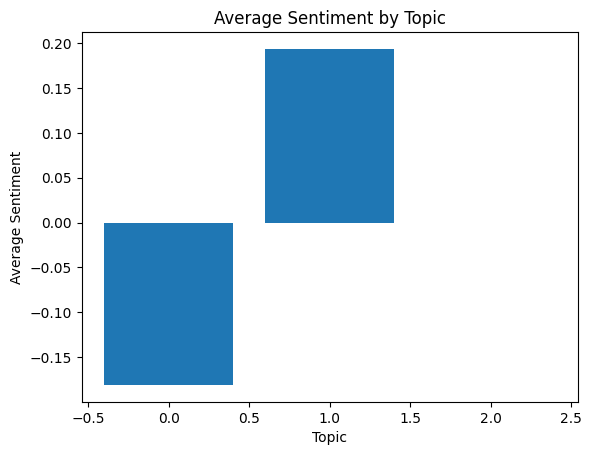

Top 10 words for topic #0:
['want', 'study', 'problem', 'class', 'thats', 'public', 'time', 'system', 'grade', 'subject']


Top 10 words for topic #1:
['thats', 'good', 'exam', 'ust', 'course', 'system', 'still', 'prof', 'college', 'university']


Top 10 words for topic #2:
['still', 'thats', 'would', 'thing', 'think', 'learning', 'system', 'public', 'year', 'time']




In [68]:
# Optionally, visualize the results
plt.bar(topic_sentiment_agg['Topic'], topic_sentiment_agg['Average Sentiment'])
plt.xlabel('Topic')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Topic')
plt.show()

# Additional code to display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

In [69]:
# Convert sentiment scores to binary labels: positive sentiment as 1, negative/neutral as 0
data['Sentiment_Label'] = data['Sentiment Score'].apply(lambda x: 1 if x > 0 else 0)

# Ensure there are no non-numeric values in the target column
assert data['Sentiment_Label'].apply(lambda x: isinstance(x, (int, float))).all(), "Non-numeric values found in target variable"

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Lemmatized Comment Body'])
y = data['Sentiment_Label']

# Verify the target variable
print("Target variable distribution:")
print(data['Sentiment_Label'].value_counts())

Target variable distribution:
Sentiment_Label
0    227
1    212
Name: count, dtype: int64


# Classification Models

In [70]:
# Split the data into training, testing, and validation sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

## Logistic Regression Model

In [71]:
# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## Rule Based Approach

In [72]:
# Rule-based approach
def rule_based_sentiment(comment):
    sentences = word_tokenize(comment)
    sentiment_scores = []
    for sentence in sentences:
        analysis = TextBlob(sentence)
        sentiment_scores.append(analysis.sentiment.polarity)

    if len(sentiment_scores) == 0:
        return 0

    overall_sentiment = sum(sentiment_scores) / len(sentiment_scores)

    if overall_sentiment > 0:
        return 1
    elif overall_sentiment < 0:
        return 0
    else:
        return 0

data['Rule-based Sentiment'] = data['Lemmatized Comment Body'].apply(rule_based_sentiment)

# Evaluate Performance

In [73]:
# Evaluate the Logistic Regression model
y_pred = log_reg.predict(X_test)
print("Logistic Regression Model Evaluation:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Evaluate the Rule-based model
y_rule_pred = data.loc[y_test.index, 'Rule-based Sentiment']
print("Rule-based Model Evaluation:")
print(confusion_matrix(y_test, y_rule_pred))
print(classification_report(y_test, y_rule_pred))
print(f"Accuracy: {accuracy_score(y_test, y_rule_pred)}")

Logistic Regression Model Evaluation:
[[20  1]
 [11 12]]
              precision    recall  f1-score   support

           0       0.65      0.95      0.77        21
           1       0.92      0.52      0.67        23

    accuracy                           0.73        44
   macro avg       0.78      0.74      0.72        44
weighted avg       0.79      0.73      0.72        44

Accuracy: 0.7272727272727273
Rule-based Model Evaluation:
[[21  0]
 [ 0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        23

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Accuracy: 1.0
